In [32]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

%matplotlib inline

In [33]:
# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 50

In [34]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
print train_X.shape

(17,)


In [35]:
X = tf.placeholder('float')
Y = tf.placeholder('float')

In [36]:
# Create Model

# Set model weights
W = tf.Variable(numpy.random.randn(), name="weight")
b = tf.Variable(numpy.random.randn(), name="bias")

In [37]:
#activation
a = W * X + b

In [38]:
#metrics
cost = tf.reduce_sum(tf.pow(a - Y, 2))/(2*n_samples)
optimiser = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [47]:
#initialize variables
init = tf.initialize_all_variables()



list

Session started
final weight and bias
0.261398  bias :  0.716549  cost:  0.0774199


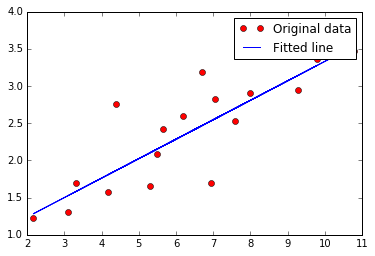

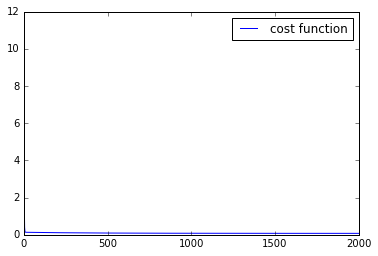

Session ended


In [58]:
with tf.Session() as sess:
    
    print 'Session started'
    sess.run(init)
    
    lcost = []
    liter = []
    
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimiser, feed_dict={X:x, Y:y})
        
        
        liter.append(epoch)
        lcost.append(sess.run(cost, feed_dict={X:train_X, Y:train_Y}))
        
        #print 'weight', sess.run(W), ' bias :', sess.run(b), ' cost: ', sess.run(cost, feed_dict={X:train_X, Y:train_Y})
    
    print 'final weight and bias'
    print sess.run(W), ' bias : ', sess.run(b), ' cost: ', sess.run(cost, feed_dict={X:train_X, Y:train_Y})
    
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    
    print 'Session ended'
            

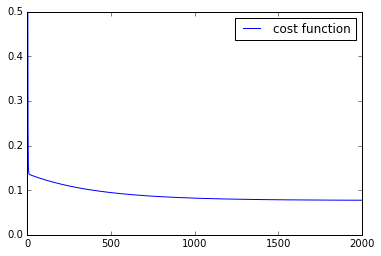

In [64]:
#Graphic display

plt.plot(liter, lcost, label='cost function')
plt.ylim(0, .5)
plt.legend()
plt.show()